# 基于SGD的推荐系统

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

In [19]:
user_num = 943
item_num = 1682
k = 5
alpha = 0.02
beta = 0.1
train_file = "./ml-100k/u1.base"
valid_file = "./ml-100k/u1.test"
steps = 8000

### 读入数据

In [20]:
def load_data(filename):
    f = open(filename)
    data = np.zeros((user_num, item_num))
    for line in f.readlines():
        lines = line.strip().split("\t")
        data[int(lines[0])-1, int(lines[1])-1] = int(lines[2])

    return data

### 损失函数计算

In [21]:
def compute_loss(p, q, valid_data):
    loss = 0.0
    count = 0
    m, n = shape(valid_data)
    for i in range(m):
        for j in range(n):
            if valid_data[i][j] > 0:
                count += 1
                loss = loss + pow(valid_data[i][j] - np.dot(p[i, :], q[:, j]), 2)
                loss = loss + (beta / 2) * np.sum(p[i, :]**2) + np.sum(q[:, k]**2)
    return loss/count

### SGD求解

In [22]:
def matrix_factorization(train_data, valid_data):
    m, n = shape(train_data)
    p = np.random.rand(m, k)
    q = np.random.rand(k, n)
    loss_valid = []
    data_index = list(range(m * n))
    for step in range(steps):
        while 1:
            rand_index = int(random.uniform(0, len(data_index)))
            i = int(rand_index / item_num)
            j = int(rand_index % item_num)
            if train_data[i, j] > 0:
                break
            else:
                del (data_index[rand_index])
                continue
        error = train_data[i, j] - np.dot(p[i, :], q[:, j])
        p[i, :] = p[i, :] + alpha * (2 * error * np.transpose(q[:, j]) - beta * p[i, :])
        q[:, j] = q[:, j] + alpha * (2 * error * np.transpose(p[i, :]) - beta * q[:, j])
        if step % 1000 == 0:
            loss_step = compute_loss(p, q, valid_data)
            loss_valid.append(loss_step)
            print('step {0}: valid_loss={1}'.format(step, loss_step))
        del (data_index[rand_index])
    return p, q, loss_valid

### 绘图 

In [23]:
def plot_loss(y1):
    plt.plot(y1, label='loss')
    plt.legend()
    plt.xlabel('Iteration / 1000')
    plt.ylabel('Loss')
    plt.show()

step 0: valid_loss=8.357594806137344
step 1000: valid_loss=6.753393430690821
step 2000: valid_loss=5.433592559047671
step 3000: valid_loss=4.574114387772791
step 4000: valid_loss=4.006655692467907
step 5000: valid_loss=3.6374832178603618
step 6000: valid_loss=3.4130726215440825
step 7000: valid_loss=3.2574668050290287


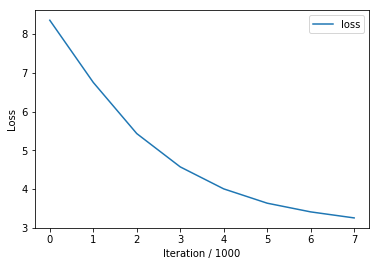

In [24]:
if __name__ == "__main__":
    train_f = load_data(train_file)
    valid_f = load_data(valid_file)
    Pn, Qn, loss_main = matrix_factorization(train_f, valid_f)
    plot_loss(loss_main)